In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
import math
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [3]:
brent=pd.read_csv("BrentOilPrices.csv")  
brent["Date"]=brent["Date"].astype('datetime64[ns]') # Convert column to date format
brent.columns=["date","oil_price"]
brent.head()
# brent_df.columns=['date','oil_price']
# brent_df.set_index('date');
# brent_df['date']=brent_df["date"].astype('datetime64[ns]')
# brent_df.head()

,date,oil_price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [14]:
aapl=pd.read_csv("AAPL.csv")  
aapl["Date"]=aapl["Date"].astype('datetime64[ns]') # Convert column to date format
aapl.columns=["date","share_price"]
# aapl.head()

all_data=pd.DataFrame()
stock = aapl
test=pd.DataFrame(brent) # VLOOKUP equivalent in Python to merge 2 sets of data
output=stock.merge(test,on="date",how="left")
stock["oil_price"]=output["oil_price"]
stock['share_price']=pd.to_numeric(stock['share_price'], errors='coerce').dropna(0)
stock['oil_price']=pd.to_numeric(stock['oil_price'], errors='coerce').dropna(0)
stock["year"]=pd.to_datetime(stock["date"]).dt.year # Create a column with the year to filter later
# stock["name"]=shares[index]
stock = stock.dropna() # get rid of all the NAN rows.
# 3.- Feature Engineering. Create new column with scaled share price from 0 to 1.
#     This will help us comparing companies later on.
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
stock["share_price_scaled"]=scaler.fit_transform(stock["share_price"].to_frame())
all_data = all_data.append(stock)
all_data.head()


,date,share_price,oil_price,year,share_price_scaled
0,1987-05-20,0.332589,18.63,1987,0.001562
1,1987-05-21,0.332589,18.45,1987,0.001562
2,1987-05-22,0.330915,18.55,1987,0.001550
3,1987-05-26,0.348214,18.63,1987,0.001675
4,1987-05-27,0.354911,18.60,1987,0.001723


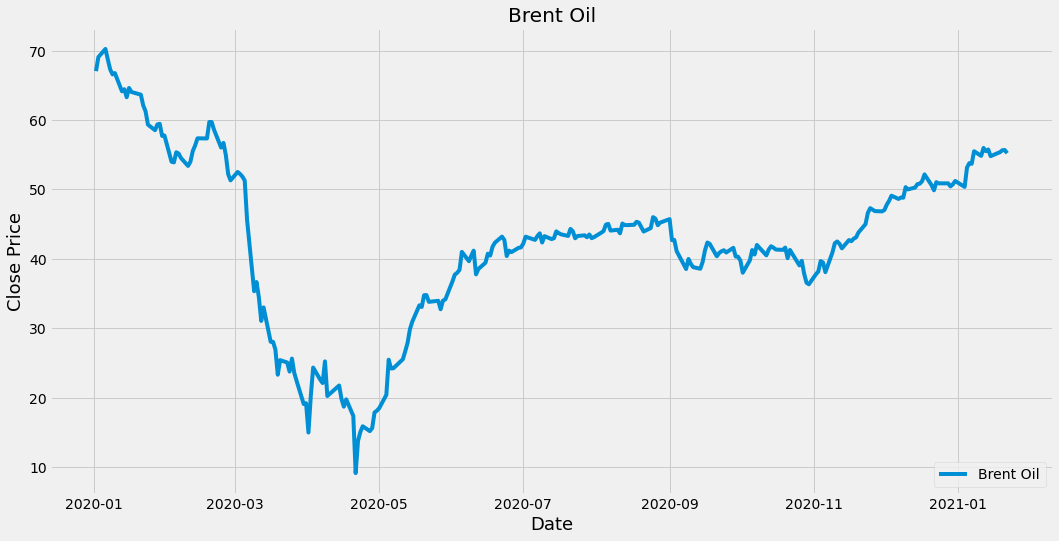

In [48]:
small_data = all_data[all_data['year']>2019]
small_data.describe
plt.figure(figsize=(16,8))
plt.title('Brent Oil')
plt.plot(small_data[['date','oil_price']].set_index('date'))
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.legend(['Brent Oil'], loc='lower right')

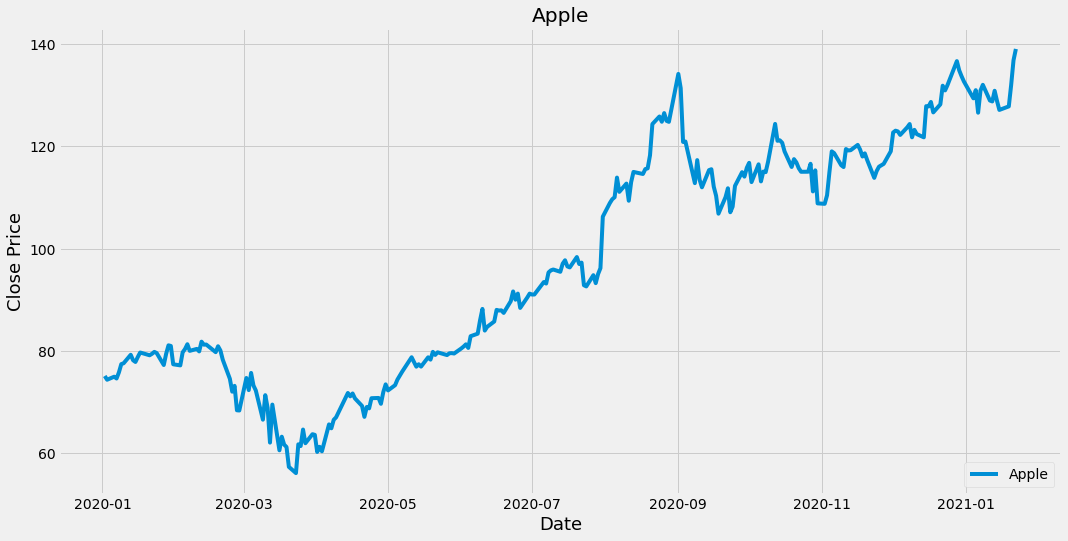

In [49]:
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.plot(small_data[['date','share_price']].set_index('date'))
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.legend(['Apple'], loc='lower right')

In [39]:
#==============================================================================
# Supervised learning linear regression
#==============================================================================

from sklearn import linear_model

# 1.- Data preparation
shell15=pd.DataFrame()
shell15=all_data[all_data['year']>2019] # Extract data from years 2016/17
shell15.describe

shell15=shell15[["share_price","oil_price"]].reset_index()

# Just using 1 variable for linear regression. To try with more variables use randomforest
# Split the data into training/testing sets
train = shell15[:-100]
test = shell15[-100:]

x_train=train["oil_price"].to_frame() #converts the pandas Series to numpy.ndarray
y_train=train['share_price'].to_frame()
x_test=test["oil_price"].to_frame() #converts the pandas Series to numpy.ndarray
y_test=test['share_price'].to_frame()

# 2.- Create linear regression object
regr = linear_model.LinearRegression()

# 3.- Train the model using the training sets
regr.fit(x_train,y_train)

# The coefficients
print("Coefficients: ",  float(regr.coef_))
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(x_train) - y_train) ** 2))

Coefficients:  0.35106278879355135
Mean squared error: 219.76


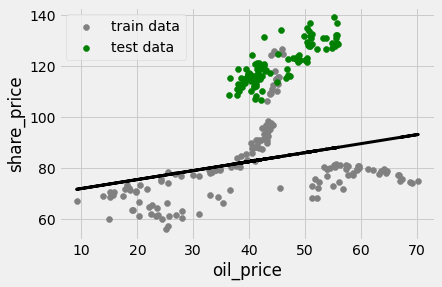

In [41]:
# Plot outputs using matplotlib
plt_train=plt.scatter(x_train, y_train,  color='grey')
plt_test=plt.scatter(x_test, y_test,  color='green')
plt.plot(x_train, regr.predict(x_train), color='black', linewidth=3)
plt.plot(x_test,regr.predict(x_test),  color='black', linewidth=3)
plt.xlabel("oil_price")
plt.ylabel("share_price")
plt.legend((plt_train, plt_test),("train data", "test data"))
plt.show()

In [86]:
msft=pd.read_csv("MSFT.csv")  
msft["Date"]=msft["Date"].astype('datetime64[ns]') # Convert column to date format
msft.columns=["date","msft_price"]
msft.head()

# shell15.head()


# all_data=pd.DataFrame()
# stock2 = msft
# stock2['share_price']=pd.to_numeric(stock2['share_price'], errors='coerce').dropna(0)
# stock2["year"]=pd.to_datetime(stock2["date"]).dt.year # Create a column with the year to filter later
# stock2 = stock2.dropna() # get rid of all the NAN rows.
# stock2.head()


,date,msft_price
0,1987-05-20,0.380208
1,1987-05-21,0.387153
2,1987-05-22,0.375868
3,1987-05-26,0.380208
4,1987-05-27,0.380208


In [74]:
from sklearn.ensemble import RandomForestRegressor
# 1.- Data Preparation
# shell15=pd.DataFrame()
# shell15=all_data13[(all_data13['name']=="RDSB.L") & (all_data13['year']>2015 )]
# shell15=shell15[["share_price","oil_price"]].reset_index()

# msft_stock=stock2[stock2['year']>2019]
# msft_stock.head(-5)
# msft_stock.describe()


,share_price,year
count,267.000000,267.000000
mean,194.335168,2020.052434
std,23.087030,0.223320
min,135.419998,2020.000000
25%,176.049996,2020.000000
50%,202.679993,2020.000000
75%,213.775002,2020.000000
max,231.649994,2021.000000


In [76]:

# shell15['MSFT']=msft_stock['share_price']

# shell15.head(-5)
# # Load share price of other variables
# shell15['PMO.L']=all_data13[(all_data13['name']=="PMO.L")][-373:].reset_index()['share_price']
# shell15['CNE.L']=all_data13[(all_data13['name']=="CNE.L")][-373:].reset_index()['share_price']
# shell15['FP.PA']=all_data13[(all_data13['name']=="FP.PA")][-373:].reset_index()['share_price']
# shell15['ENGI.PA']=all_data13[(all_data13['name']=="ENGI.PA")][-373:].reset_index()['share_price']

# train = shell15[:-100]
# test = shell15[-100:]

# x_train=train[["oil_price","PMO.L","CNE.L","FP.PA","ENGI.PA"]]
# y_train=train['share_price']

# x_test=test[["oil_price","PMO.L","CNE.L","FP.PA","ENGI.PA"]] 
# y_test=test['share_price'].to_frame()


# # 2.- Create Randomforest object usinig a max depth=5
# regressor = RandomForestRegressor(n_estimators=200, max_depth=5 )

# # 3.- Train data
# clf=regressor.fit(x_train, y_train)

# # 4.- Predict!
# y_pred=regressor.predict(x_test)
# y_pred=pd.DataFrame(y_pred)

,index,share_price,oil_price,MSFT
0,8221,75.087502,67.05,NaN
1,8222,74.357498,69.08,NaN
2,8223,74.949997,70.25,NaN
3,8224,74.597504,68.74,NaN
4,8225,75.797501,67.31,NaN
...,...,...,...,...
254,8478,132.050003,55.51,NaN
255,8479,128.979996,54.84,NaN
256,8480,128.800003,55.98,NaN
257,8481,130.889999,55.52,NaN


In [92]:


msft.head()
# #brent.head()
# aapl.head()
test_merge=pd.DataFrame(aapl)
output_merge=msft.merge(test_merge,on="date",how="left")
output_merge.head(-5)

from sklearn.ensemble import RandomForestRegressor
# 1.- Data Preparation
shell15=pd.DataFrame()
shell15=output_merge[output_merge['year']>2019] # Extract data from years 2016/17
shell15.head(-5)

# shell15=shell15[["share_price","oil_price"]].reset_index()
# shell15.head(-5)
# shell15['PMO.L']=all_data13[(all_data13['name']=="PMO.L")][-100:].reset_index()['share_price']

train = shell15[:-100]
test = shell15[-100:]


x_train=train[["oil_price","msft_price"]]
y_train=train['share_price']

x_test=test[["oil_price","msft_price"]] 
y_test=test['share_price'].to_frame()


# 2.- Create Randomforest object usinig a max depth=5
regressor = RandomForestRegressor(n_estimators=200, max_depth=5 )

# 3.- Train data
clf=regressor.fit(x_train, y_train)

# 4.- Predict!
y_pred=regressor.predict(x_test)
y_pred=pd.DataFrame(y_pred)



ValueError: ignored